In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd





In [2]:
colors = [
    '#1f77b4',  # blue
    '#ff7f0e',  # orange
    '#2ca02c',  # green
    '#d62728',  # red
    '#9467bd',  # purple
    '#8c564b',  # brown
    '#e377c2',  # pink
    '#7f7f7f',  # gray
    '#bcbd22',  # yellow-green
    '#17becf'   # cyan
]

In [ ]:
import pandas as pd

# Input data
runtime_data = {
    "store_conf": [
        "SSD 2n", "SSD 5n", "SSD 10n", 
        "TMPFS 2n", "TMPFS 5n", "TMPFS 10n", 
        "BeeGFS 2n", "BeeGFS 5n", "BeeGFS 10n"
    ],
    # "indiv+merge": [
    #     136.3890341, 96.17584385, 81.41225361,
    #     126.8171576, 54.7322081, 53.00270566,
    #     684.8986133, 669.5675338, 418.9379948
    # ],
    "indiv+merge": [
        264.1850665, 122.3437138, 65.5730081,
        249.8208389, 116.1019967, 63.51818533,
        684.8986654, 669.5675747, 418.9379948
    ],
    "merge+mutation": [
        5.992466667, 6.008466667, 5.627866667,
        5.8528, 5.610266667, 5.611866667,
        28.94740214, 31.9291954, 26.91863131
    ],
    "merge+freq": [
        73.14913333, 93.1739, 66.35396667,
        62.48306667, 57.52516667, 66.33796667,
        115.2571634, 111.4020991, 72.62299695
    ],
    "sift+mutation": [
        6.819533333, 6.652866667, 6.3748,
        6.7824, 6.291466667, 6.291466667,
        28.84623737, 31.8303015, 26.8568694
    ],
    "sift+freq": [
        73.9762, 93.8183, 67.1009,
        63.41266667, 58.20636667, 67.01756667,
        115.1559987, 111.3032052, 72.56123504
    ]
}

# Create DataFrame
df = pd.DataFrame(runtime_data)

# Construct result dictionary
runtime_rank_dict = {}
for col in df.columns[1:]:  # exclude 'store_conf'
    sorted_df = df[['store_conf', col]].sort_values(by=col)
    rankings = {row['store_conf']: rank + 1 for rank, row in enumerate(sorted_df.to_dict('records'))}
    runtime_rank_dict[col] = [
        {
            "store_conf": row['store_conf'],
            "runtime": row[col],
            "rank": rankings[row['store_conf']]
        }
        for _, row in df.iterrows()
    ]

# Display runtime_rank_dict dictionary
import json
print(json.dumps(runtime_rank_dict, indent=2))


{
  "indiv+merge": [
    {
      "store_conf": "SSD 2n",
      "runtime": 264.1850665,
      "rank": 6
    },
    {
      "store_conf": "SSD 5n",
      "runtime": 122.3437138,
      "rank": 4
    },
    {
      "store_conf": "SSD 10n",
      "runtime": 65.5730081,
      "rank": 2
    },
    {
      "store_conf": "TMPFS 2n",
      "runtime": 249.8208389,
      "rank": 5
    },
    {
      "store_conf": "TMPFS 5n",
      "runtime": 116.1019967,
      "rank": 3
    },
    {
      "store_conf": "TMPFS 10n",
      "runtime": 63.51818533,
      "rank": 1
    },
    {
      "store_conf": "BeeGFS 2n",
      "runtime": 684.8986654,
      "rank": 9
    },
    {
      "store_conf": "BeeGFS 5n",
      "runtime": 669.5675747,
      "rank": 8
    },
    {
      "store_conf": "BeeGFS 10n",
      "runtime": 418.9379948,
      "rank": 7
    }
  ],
  "merge+mutation": [
    {
      "store_conf": "SSD 2n",
      "runtime": 5.992466667,
      "rank": 5
    },
    {
      "store_conf": "SSD 5n",
      "run

In [ ]:
import pandas as pd

# Input data
spm_data = {
    "store_conf": [
        "SSD 2n", "SSD 5n", "SSD 10n",
        "TMPFS 2n", "TMPFS 5n", "TMPFS 10n",
        "BeeGFS 2n", "BeeGFS 5n", "BeeGFS 10n"
    ],
    "indiv+merge": [ # data stage_in + p+c
        # 0.000143426, 0.000167614, 0.000162747,
        # 2.69E-05, 2.32E-05, 1.95E-05,
        # 0.000239522, 0.000221281, 0.000202274
        
        (101.43620989678027 + 0.000162747), (16.90360851599917 + 0.000167614), (14.528247795744527 + 0.000143426), 
        (41.21346329480432 + 0.096237997), (18.36111297366226 + 0.090998099), (15.834521761208176 + 0.080542054),
        (1416.964875293468 + 0.5185714) , (170.93783020989645 + 0.39106142131806715), (131.5569477291002 + 0.2185533200137021) 

    ],
    "merge+mutation": [ # no need for stage_in
        # 1.368399424, 1.05974237, 0.775415808,
        # 0.000619046, 0.000521181, 0.000413222,
        # 6.014328996, 4.829167951, 3.793028679

        (0.1400385668861806 ), (0.093596133 ), (0.05675352 ),
        (0.092820425 ), ( 0.083857247), ( 0.068888796),
        (0.4664821108876095 ), (0.3717250200703338 ), (0.24148853749987667 )
    ],
    "merge+freq": [ # no need for stage_in
        # 36.41135129, 28.80731772, 20.4492381,
        # 0.000748764, 0.00063261, 0.000503361,
        # 131.1641205, 105.7691405, 76.45086876

        (0.17016841458933896), (0.12117798209576568), (0.077092575),
        (0.11355885512119306), (0.1096278290468283), (0.10169993407167026),
        (0.5350177686113383), (0.4157897002978555), (0.24063279146085492),
    ],
    "sift+mutation": [ # no need for stage_in
        # 1.528375918, 1.180644147, 0.861215721,
        # 0.000349312, 0.000292993, 0.000230603,
        # 6.807424434, 5.465389986, 4.292365643

        (0.12421722386065209), (0.086242405), (0.051304557),
        (0.091608007), (0.082888837), (0.067999151),
        (0.4727078902232018), (0.3729535032871381), (0.24277634854955232),

    ],
    "sift+freq": [ # no need for stage_in
        # 43.25348095, 34.21686728, 24.28487205,
        # 0.000391841, 0.000330981, 0.00026215,
        # 155.913179, 125.7256936, 90.87434994

        (0.15434707156381045), (0.11382425421647213), (0.071643611),
        (0.11234643734259014), (0.10865941911148917), (0.10081028907698561),
        (0.5305679753336401), (0.41287310494447604), (0.23866447575956998),

    ]
}

df = pd.DataFrame(spm_data)

# Helper to extract number of nodes
def extract_nodes(conf):
    return int(conf.split()[1][:-1])

# Construct dictionary
spm_rank_dict = {}
for column in df.columns[1:]:
    # Rank using value ascending, then node count descending
    sorted_df = df.sort_values(
        by=[column, "store_conf"],
        key=lambda col: (
            col if col.name != "store_conf" else col.map(lambda x: -extract_nodes(x))
        ),
        ascending=[True, True]
    ).reset_index()

    # Build a lookup table for ranks
    rank_lookup = {
        df.loc[i, "store_conf"]: rank + 1 for rank, i in enumerate(sorted_df["index"])
    }

    # Store spm_rank_dict per column
    spm_rank_dict[column] = [
        {
            "store_conf": row["store_conf"],
            "runtime": row[column],
            "rank": rank_lookup[row["store_conf"]]
        }
        for _, row in df.iterrows()
    ]

# Optional: print or export
import json
print(json.dumps(spm_rank_dict, indent=2))



{
  "indiv+merge": [
    {
      "store_conf": "SSD 2n",
      "runtime": 101.43637264378027,
      "rank": 6
    },
    {
      "store_conf": "SSD 5n",
      "runtime": 16.90377612999917,
      "rank": 3
    },
    {
      "store_conf": "SSD 10n",
      "runtime": 14.528391221744526,
      "rank": 1
    },
    {
      "store_conf": "TMPFS 2n",
      "runtime": 41.30970129180432,
      "rank": 5
    },
    {
      "store_conf": "TMPFS 5n",
      "runtime": 18.45211107266226,
      "rank": 4
    },
    {
      "store_conf": "TMPFS 10n",
      "runtime": 15.915063815208176,
      "rank": 2
    },
    {
      "store_conf": "BeeGFS 2n",
      "runtime": 1417.4834466934678,
      "rank": 9
    },
    {
      "store_conf": "BeeGFS 5n",
      "runtime": 171.3288916312145,
      "rank": 8
    },
    {
      "store_conf": "BeeGFS 10n",
      "runtime": 131.7755010491139,
      "rank": 7
    }
  ],
  "merge+mutation": [
    {
      "store_conf": "SSD 2n",
      "runtime": 0.1400385668861806,
   

In [5]:
import pandas as pd

def compute_rank_error(runtime_rank_dict, spm_rank_dict):
    stages = list(runtime_rank_dict.keys())
    num_ranks = len(runtime_rank_dict[stages[0]])  # Typically 9
    rank_error_table = []

    for rank_idx in range(num_ranks):  # R1 to R9
        rank_row = []
        for stage in stages:
            # Find store_conf predicted by SPM at current rank
            spm_entry = next((entry for entry in spm_rank_dict[stage] if entry["rank"] == rank_idx + 1), None)
            if not spm_entry:
                rank_row.append(None)
                continue
            predicted_conf = spm_entry["store_conf"]

            # Find actual rank of the predicted store_conf
            actual_entry = next((entry for entry in runtime_rank_dict[stage] if entry["store_conf"] == predicted_conf), None)
            if not actual_entry:
                rank_row.append(None)
                continue
            actual_rank = actual_entry["rank"]

            # Calculate absolute difference
            rank_error = abs((rank_idx + 1) - actual_rank)
            rank_row.append(rank_error)
        rank_error_table.append(rank_row)

    # Format as DataFrame
    rank_labels = [f"R{i+1}" for i in range(num_ranks)]
    df_rank_error = pd.DataFrame(rank_error_table, columns=stages, index=rank_labels)
    return df_rank_error

# Example usage:
rank_error_table = compute_rank_error(runtime_rank_dict, spm_rank_dict)
print(rank_error_table)


    indiv+merge  merge+mutation  merge+freq  sift+mutation  sift+freq
R1            1               2           3              2          3
R2            1               0           1              1          1
R3            1               2           2              1          2
R4            1               0           2              0          2
R5            0               1           2              0          2
R6            0               1           0              0          0
R7            0               0           2              0          2
R8            0               1           0              1          0
R9            0               1           0              1          0


In [6]:
import pandas as pd

def compute_local_rank_deviation(runtime_rank_dict, spm_rank_dict):
    stages = list(runtime_rank_dict.keys())
    num_ranks = len(runtime_rank_dict[stages[0]])  # Typically 9 ranks
    penalty_table = []

    for rank_idx in range(num_ranks):  # R1 to R9
        rank_row = []
        for stage in stages:
            # Get the actual store_conf at this rank
            actual_entry = next((entry for entry in runtime_rank_dict[stage] if entry["rank"] == rank_idx + 1), None)
            print(f"{stage}: R[{rank_idx}] actual_entry:{actual_entry}")
            if not actual_entry:
                rank_row.append(None)
                continue
            actual_conf = actual_entry["store_conf"]
            actual_runtime = actual_entry["runtime"]

            # Get the SPM-predicted rank for that same store_conf
            spm_entry = next((entry for entry in spm_rank_dict[stage] if entry["rank"] == rank_idx + 1), None)
            
            if not spm_entry:
                rank_row.append(None)
                continue
            spm_conf = spm_entry["store_conf"]
            spm_actual_entry = next((entry for entry in runtime_rank_dict[stage] if entry["store_conf"] == spm_conf), None)
            spm_runtime = spm_actual_entry["runtime"]
            print(f"{stage}: R[{rank_idx}] spm_runtime:{spm_runtime} spm_entry:{spm_entry}")

            # Compute penalty: can be negative or positive
            penalty_percent = 100 * (spm_runtime - actual_runtime) / actual_runtime
            rank_row.append(penalty_percent)
        penalty_table.append(rank_row)

    # Format as DataFrame
    rank_labels = [f"R{i+1}" for i in range(num_ranks)]
    df_penalty = pd.DataFrame(penalty_table, columns=stages, index=rank_labels)
    return df_penalty

# Example usage:
local_deviation_table = compute_local_rank_deviation(runtime_rank_dict, spm_rank_dict)
print(local_deviation_table)


indiv+merge: R[0] actual_entry:{'store_conf': 'TMPFS 10n', 'runtime': 63.51818533, 'rank': 1}
indiv+merge: R[0] spm_runtime:65.5730081 spm_entry:{'store_conf': 'SSD 10n', 'runtime': 14.528391221744526, 'rank': 1}
merge+mutation: R[0] actual_entry:{'store_conf': 'TMPFS 5n', 'runtime': 5.610266667, 'rank': 1}
merge+mutation: R[0] spm_runtime:5.627866667 spm_entry:{'store_conf': 'SSD 10n', 'runtime': 0.05675352, 'rank': 1}
merge+freq: R[0] actual_entry:{'store_conf': 'TMPFS 5n', 'runtime': 57.52516667, 'rank': 1}
merge+freq: R[0] spm_runtime:66.35396667 spm_entry:{'store_conf': 'SSD 10n', 'runtime': 0.077092575, 'rank': 1}
sift+mutation: R[0] actual_entry:{'store_conf': 'TMPFS 10n', 'runtime': 6.291466667, 'rank': 1}
sift+mutation: R[0] spm_runtime:6.3748 spm_entry:{'store_conf': 'SSD 10n', 'runtime': 0.051304557, 'rank': 1}
sift+freq: R[0] actual_entry:{'store_conf': 'TMPFS 5n', 'runtime': 58.20636667, 'rank': 1}
sift+freq: R[0] spm_runtime:67.1009 spm_entry:{'store_conf': 'SSD 10n', 'ru

In [7]:
import pandas as pd

def compute_global_rank_deviation(runtime_rank_dict, spm_rank_dict):
    stages = list(runtime_rank_dict.keys())
    num_ranks = len(runtime_rank_dict[stages[0]])  # Typically 9 ranks
    penalty_table = []

    for rank_idx in range(num_ranks):  # R1 to R9
        rank_row = []
        for stage in stages:
            # Get the actual store_conf at this rank
            actual_entry = next((entry for entry in runtime_rank_dict[stage] if entry["rank"] == rank_idx + 1), None)
            print(f"{stage}: R[{rank_idx}] actual_entry:{actual_entry}")
            if not actual_entry:
                rank_row.append(None)
                continue
            actual_conf = actual_entry["store_conf"]
            actual_runtime = actual_entry["runtime"]

            # Get the SPM-predicted rank actual runtime of workflow with the same rank storages
            rank_runtime = 0
            for st in stages:
                entry = next((entry for entry in runtime_rank_dict[st] if entry["rank"] == rank_idx + 1), None)
                rank_runtime += entry["runtime"]
            
            # Get the SPM-predicted rank actual runtime for that same store_conf
            spm_entry = next((entry for entry in spm_rank_dict[stage] if entry["rank"] == rank_idx + 1), None)
            
            if not spm_entry:
                rank_row.append(None)
                continue
            spm_conf = spm_entry["store_conf"]
            spm_actual_entry = next((entry for entry in runtime_rank_dict[stage] if entry["store_conf"] == spm_conf), None)
            spm_runtime = spm_actual_entry["runtime"]
            print(f"{stage}: R[{rank_idx}] spm_runtime[{spm_conf}]:{spm_runtime} , rank_runtime:{rank_runtime}")

            # Compute penalty: can be negative or positive
            penalty_percent = 100 * (spm_runtime - actual_runtime) / rank_runtime
            rank_row.append(penalty_percent)
        penalty_table.append(rank_row)

    # Format as DataFrame
    rank_labels = [f"R{i+1}" for i in range(num_ranks)]
    df_penalty = pd.DataFrame(penalty_table, columns=stages, index=rank_labels)
    return df_penalty

# Example usage:
global_deviation_table = compute_global_rank_deviation(runtime_rank_dict, spm_rank_dict)
print(global_deviation_table)


indiv+merge: R[0] actual_entry:{'store_conf': 'TMPFS 10n', 'runtime': 63.51818533, 'rank': 1}
indiv+merge: R[0] spm_runtime[SSD 10n]:65.5730081 , rank_runtime:191.151452004
merge+mutation: R[0] actual_entry:{'store_conf': 'TMPFS 5n', 'runtime': 5.610266667, 'rank': 1}
merge+mutation: R[0] spm_runtime[SSD 10n]:5.627866667 , rank_runtime:191.151452004
merge+freq: R[0] actual_entry:{'store_conf': 'TMPFS 5n', 'runtime': 57.52516667, 'rank': 1}
merge+freq: R[0] spm_runtime[SSD 10n]:66.35396667 , rank_runtime:191.151452004
sift+mutation: R[0] actual_entry:{'store_conf': 'TMPFS 10n', 'runtime': 6.291466667, 'rank': 1}
sift+mutation: R[0] spm_runtime[SSD 10n]:6.3748 , rank_runtime:191.151452004
sift+freq: R[0] actual_entry:{'store_conf': 'TMPFS 5n', 'runtime': 58.20636667, 'rank': 1}
sift+freq: R[0] spm_runtime[SSD 10n]:67.1009 , rank_runtime:191.151452004
indiv+merge: R[1] actual_entry:{'store_conf': 'SSD 10n', 'runtime': 65.5730081, 'rank': 2}
indiv+merge: R[1] spm_runtime[TMPFS 10n]:63.5181

# Below plot 1000 Genome

R1: [1, 2, 3, 2, 3]
R2: [1, 0, 1, 1, 1]
R3: [1, 2, 2, 1, 2]
R4: [1, 0, 2, 0, 2]
R5: [0, 1, 2, 0, 2]
R6: [0, 1, 0, 0, 0]
R7: [0, 0, 2, 0, 2]
R8: [0, 1, 0, 1, 0]
R9: [0, 1, 0, 1, 0]


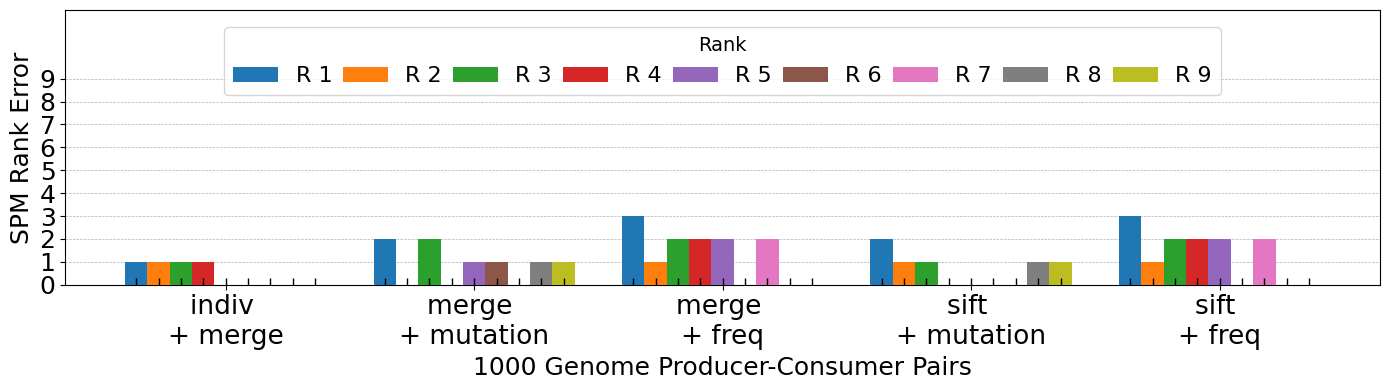

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Labels (workflows) and Ranks
labels = ['indiv \n+ merge', 'merge \n+ mutation', 'merge \n+ freq', 'sift \n+ mutation', 'sift \n+ freq']
ranks = ['R 1', 'R 2', 'R 3', 'R 4', 'R 5', 'R 6', 'R 7', 'R 8', 'R 9']

# Convert DataFrame to list of lists (row-wise values only)
rank_error = rank_error_table.values.tolist()

# Optional: Display the result
for i, row in enumerate(rank_error, start=1):
    print(f"R{i}: {row}")


# Bar plot config
x = np.arange(len(labels))
bar_width = 0.09

plt.figure(figsize=(14, 4))
for i in range(len(ranks)):
    plt.bar(x + i * bar_width, rank_error[i], width=bar_width, color=colors[i], label=ranks[i], zorder=3)

# Add tick for 0 bars
for i in range(len(ranks)):
    for j, val in enumerate(rank_error[i]):
        xpos = x[j] + i * bar_width
        plt.plot(xpos, 0, marker='|', color='black', markersize=10, zorder=4)

# Axis and legend
plt.xticks(x + (len(ranks) - 1) * bar_width / 2, labels, fontsize=19)
plt.yticks(np.arange(0, 10, 1), fontsize=18)
plt.ylim(0, len(ranks)+3)
plt.ylabel('SPM Rank Error', fontsize=18)
plt.xlabel('1000 Genome Producer-Consumer Pairs', fontsize=18)
# plt.title('SPM Rank Error', fontsize=18)
plt.grid(axis='y', linestyle='--', linewidth=0.5, zorder=0)

# Legend on top
plt.legend(title='Rank', title_fontsize=14, fontsize=16, ncol=9, loc='lower center',
           bbox_to_anchor=(0.5, 0.65), columnspacing=0.5)

plt.tight_layout()
plt.savefig("1kg_spm_rank_error.pdf", format='pdf', bbox_inches='tight')
plt.show()


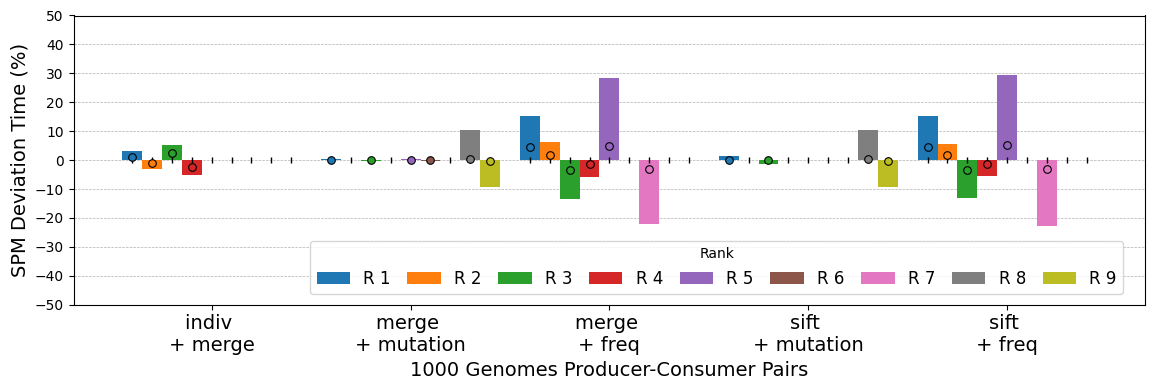

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Labels (workflows) and Ranks
labels = ['indiv \n+ merge', 'merge \n+ mutation', 'merge \n+ freq', 'sift \n+ mutation', 'sift \n+ freq']
ranks = ['R 1', 'R 2', 'R 3', 'R 4', 'R 5', 'R 6', 'R 7', 'R 8', 'R 9']

# Bar and dot plot data
local_deviation = local_deviation_table.values.tolist()
global_deviation = global_deviation_table.values.tolist()

x = np.arange(len(labels))
bar_width = 0.1
fig, ax1 = plt.subplots(figsize=(12, 4))

# Plot bars
for i in range(len(ranks)):
    for j, val in enumerate(local_deviation[i]):
        xpos = x[j] + i * bar_width
        label = ranks[i] if j == 0 else None  # Only label once per rank
        bar = ax1.bar(xpos, val, width=bar_width, color=colors[i], label=label, zorder=3)


        # # Add text if bar > 100
        # if val > 50:
        #     ax1.text(
        #         xpos, 40, f'{val:.1f}',
        #         ha='center', va='bottom', fontsize=7, rotation=90, color='white',
        #         bbox=dict(facecolor='black', edgecolor='white', boxstyle='square,pad=0.8', alpha=0.6)
        #     )
        # if val < -50:
        #     ax1.text(
        #         xpos, -40, f'{val:.1f}',
        #         ha='center', va='bottom', fontsize=7, rotation=90, color='white',
        #         bbox=dict(facecolor='black', edgecolor='white', boxstyle='square,pad=0.8', alpha=0.6)
        #     )

# Tick marker for 0 bars
for i in range(len(ranks)):
    for j, val in enumerate(local_deviation[i]):
        xpos = x[j] + i * bar_width
        ax1.plot(xpos, 0, marker='|', color='black', markersize=5, zorder=4)

# Plot dots with annotations
for i in range(len(ranks)):
    for j, val in enumerate(global_deviation[i]):
        xpos = x[j] + i * bar_width
        if val != 0:
            ax1.scatter(
                xpos, val,
                color=colors[i],
                marker='o',
                s=30,
                edgecolors='black',
                linewidths=0.8,
                zorder=6
            )

            # # Add text below dot if > 50
            # if val > 50:
            #     ax1.text(
            #         xpos, 20, f'{val:.1f}',
            #         ha='center', va='top', fontsize=14, rotation=0,
            #         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2', alpha=0.8)
            #     )
            # if val < -50:
            #     ax1.text(
            #         xpos, -20, f'{val:.1f}',
            #         ha='center', va='top', fontsize=14, rotation=0,
            #         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2', alpha=0.8)
            #     )

# Axes setup
centered_x = x + ((len(ranks) - 1) * bar_width) / 2
ax1.set_xticks(centered_x)
ax1.set_xticklabels(labels, fontsize=14)
ax1.set_yticks(np.arange(-100, 101, 10))
ax1.set_ylim(-50, 50)
ax1.set_ylabel('SPM Deviation Time (%)', fontsize=14)
ax1.set_xlabel('1000 Genomes Producer-Consumer Pairs', fontsize=14)
ax1.grid(axis='y', linestyle='--', linewidth=0.5, zorder=0)

# Legend
ax1.legend(title='Rank', fontsize=12, ncol=9, loc='upper center', bbox_to_anchor=(0.6, 0.25), columnspacing=1)

plt.tight_layout()
plt.savefig("1kg_spm_time_deviation.pdf", format='pdf', bbox_inches='tight')
plt.show()

# Error rate over 10% global margin of error: 4/45
# Error rate over 10% local margin of error: 12/45